# Marketing A/B Test Project

Aim: To measure the difference in conversions (buying product) between an ad and a public service announcement, and to check whether this change in performance is statistically significant.

Data dictionary:

- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

Null Hypothesis: There is no statistically significant difference in the performance of conversion rates between Ad and PSA.

## Import Packages

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statistics

## Import Data

In [8]:
data = pd.read_csv('p1_data.csv')

In [9]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## Check Data

In [11]:
# Compare "Unnamed: 0" with index

print(len(data))
print(data['Unnamed: 0'].max() + 1)

588101
588101


In [12]:
# Remove redundant column

data = data.drop('Unnamed: 0', axis=1)

First column is redundant, so removed.

In [14]:
# Check column has been removed

data.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [15]:
# Check data types of columns make sense

data.dtypes

user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [16]:
# Check for null values

data.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [17]:
# Check for duplicated data

data.duplicated().sum()

0

In [18]:
# Check User IDs makes sense

print('Min User ID: {}\nMax User ID: {}'.format(data['user id'].min(), data['user id'].max()))

Min User ID: 900000
Max User ID: 1654483


In [19]:
# Check test group values fall into either category

print(data['test group'].unique())

# Check split

print(len(data[data['test group']=='ad']) / len(data))

['ad' 'psa']
0.960000068015528


Split 96:4 (ad:psa)

In [21]:
# Check total ads are always above 0

data[data['total ads']==0]

,user id,test group,converted,total ads,most ads day,most ads hour


In [22]:
# Change column names

data.columns = ['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day',
                'most_ads_hour']

In [23]:
data.columns

Index(['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day',
       'most_ads_hour'],
      dtype='object')

## Exploratory Analysis

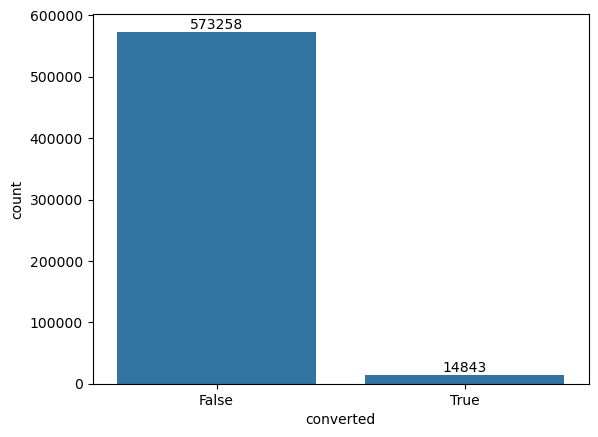

In [25]:
ax = sns.countplot(data=data, x='converted')

for i in ax.containers:
    ax.bar_label(i,)

In [26]:
# Calculate % of each group that converted

converted = data[data['converted']==True]

ad_conv = converted[converted['test_group']=='ad']
psa_conv = converted[converted['test_group']=='psa']

ad_conv_perc = np.round(len(ad_conv) / len(data[data['test_group']=='ad']) * 100, 2)
psa_conv_perc = np.round(len(psa_conv) / len(data[data['test_group']=='psa']) * 100, 2)

print('Ad conversion rate: {}%'.format(ad_conv_perc))
print('PSA conversion rate: {}%'.format(psa_conv_perc))

Ad conversion rate: 2.55%
PSA conversion rate: 1.79%


Ad has a higher conversion rate

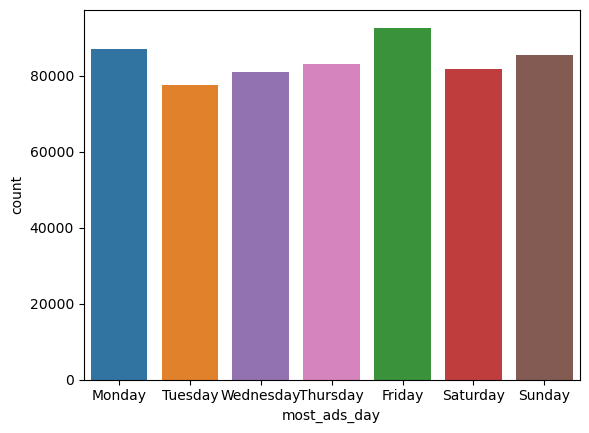

In [28]:
# Plot days with most ads seen

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax1 = sns.countplot(data=data, x='most_ads_day', hue='most_ads_day',
                    order=order)

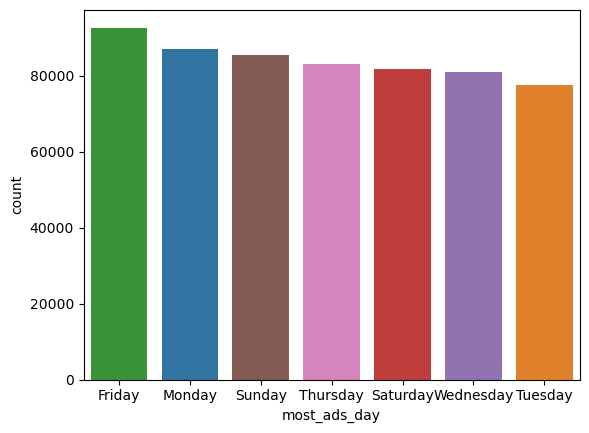

In [29]:
ax2 = sns.countplot(data=data, x='most_ads_day', hue='most_ads_day',
                    order=data['most_ads_day'].value_counts().index)

Most seen: Friday, least seen: Tuesday

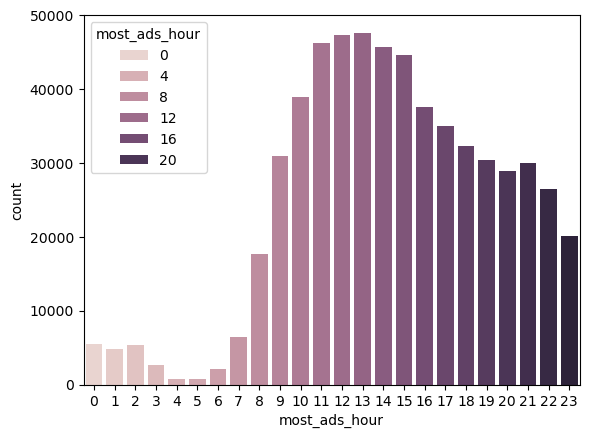

In [31]:
# Plot hours with most ads seen

order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

ax3 = sns.countplot(data=data, x='most_ads_hour', hue='most_ads_hour',
                    order=order)

Increase in seen at 8am until peak at 1pm, then slowly goes down until 11pm

In [33]:
# Ads seen by each person

total_ads_min = data['total_ads'].min()
total_ads_max = data['total_ads'].max()
total_ads_mean = data['total_ads'].mean()
total_ads_mode = data['total_ads'].mode()[0]
total_ads_median = data['total_ads'].median()

print('Minimum amount of ads seen: {}'.format(total_ads_min))
print('Maximum amount of ads seen: {}'.format(total_ads_max))
print('Mean amount of ads seen: {}'.format(total_ads_mean))
print('Mode amount of ads seen: {}'.format(total_ads_mode))
print('Median amount of ads seen: {}'.format(total_ads_median))

Minimum amount of ads seen: 1
Maximum amount of ads seen: 2065
Mean amount of ads seen: 24.82087600599217
Mode amount of ads seen: 1
Median amount of ads seen: 13.0


The distribution of averages indicates that the majority of values are fairly low, with some exceptional high values

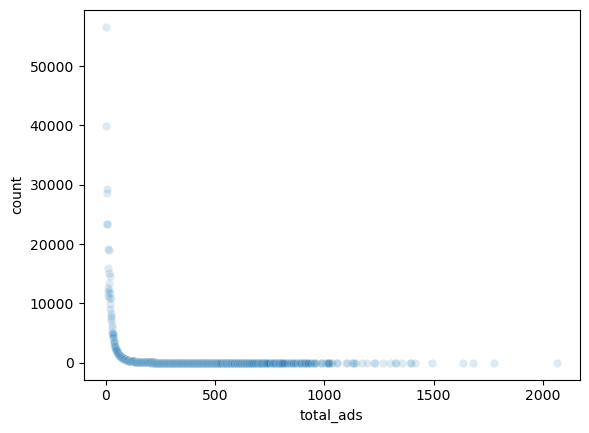

In [35]:
total_ads = data['total_ads'].value_counts().sort_index(ascending=True)

ax4 = sns.scatterplot(data=total_ads, alpha=0.15)

Majority of people were shown very few ads, below 25

In [37]:
# Comparing people who saw different number of ads

people_ad_1 = data[(data['test_group']=='ad') & (data['total_ads'] == 1)]
people_ad_2_10 = data[(data['test_group']=='ad') & ((data['total_ads'] <= 10) | (data['total_ads'] >= 2))]
people_ad_11_100 = data[(data['test_group']=='ad') & ((data['total_ads'] <= 100) | (data['total_ads'] >= 11))]
people_ad_over_100 = data[(data['test_group']=='ad') & (data['total_ads'] > 100)]

[Text(0, 0, '1'),
 Text(1, 0, '2 to 10'),
 Text(2, 0, '11 to 100'),
 Text(3, 0, 'Over 100')]

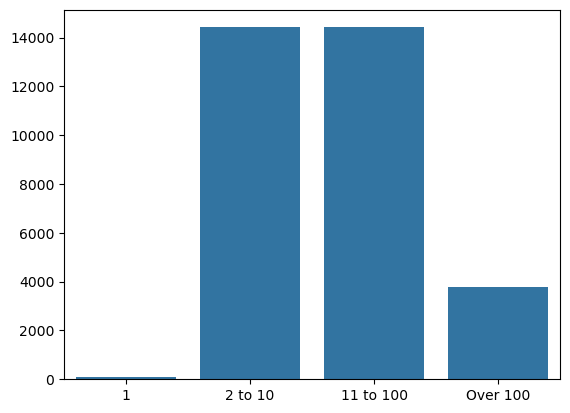

In [38]:
ax5 = sns.barplot([people_ad_1['converted'].sum(), people_ad_2_10['converted'].sum(),
             people_ad_11_100['converted'].sum(), people_ad_over_100['converted'].sum()])
ax5.set_xticks([0, 1, 2, 3])
ax5.set_xticklabels(['1', '2 to 10', '11 to 100', 'Over 100'])

Most conversions happened between 2 to 100 ads seen

## Statistical Analysis

In [41]:
# Calculate Means

total_ad_people = len(data[data['test_group']=='ad'])
mean_ad_conv = data.loc[data['test_group']=='ad', 'converted'].sum() / total_ad_people * 100

total_psa_people = len(data[data['test_group']=='psa'])
mean_psa_conv = data.loc[data['test_group']=='psa', 'converted'].sum() / total_psa_people * 100

In [42]:
print('Ad Conversion Mean: {}%'.format(np.round(mean_ad_conv, 2)))
print('PSA Conversion Mean: {}%'.format(np.round(mean_psa_conv, 2)))

Ad Conversion Mean: 2.55%
PSA Conversion Mean: 1.79%


In [43]:
ad_conv_array = data.loc[data['test_group']=='ad', 'converted'].array
psa_conv_array = data.loc[data['test_group']=='psa', 'converted'].array

In [44]:
# Calculate p-value

results = stats.ttest_ind(ad_conv_array, psa_conv_array)

In [45]:
print('P-value = {}'.format(results.pvalue))

P-value = 1.7033052627831264e-13


p-value is 1.7, which is > 0.05 - Meaning we fail to reject the null hypothesis